## Anthropometric Analysis for Skirt Pattern Design: Statistical Characterization of Lower-Body Measurement Patterns

In [624]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import streamlit as st

In [543]:
#loading the data
bm = pd.read_csv('caesar.csv')
bm.head()

,index,Unnamed: 0,age,num_children,gender,reported_height,reported_weight,reported_pants_size_waist,reported_pants_size_inseam,bra_size_chest,...,ankle_height_outside,axilla_height,elbow_height,knee_height,radial_stylion_len,sleeve_inseam,sleeve_outseam,acromion_radial_stylion_len,shoulder_len,dataset
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,caesar
1,1,1.0,47.0,0.0,male,74.0,345.0,NaN,34.0,NaN,...,3.075,57.440,47.955,20.705,10.955,19.475,24.500,25.260,8.27,caesar
2,2,10.0,50.0,0.0,male,72.0,225.0,38.0,32.0,NaN,...,2.755,54.370,46.145,19.215,10.730,18.505,23.310,23.685,9.06,caesar
3,3,100.0,28.0,0.0,male,73.0,192.0,36.0,33.0,NaN,...,3.230,53.975,45.985,20.470,10.765,18.915,23.660,24.015,8.50,caesar
4,4,103.0,52.0,2.0,male,75.0,253.0,42.0,32.0,NaN,...,3.150,55.710,48.820,20.750,10.815,18.635,23.595,24.175,8.51,caesar


In [544]:
# The overview of the data:
print(f'The number of rows in the dataframe is : {bm.shape[0]}')
print(f'The number of rows in the dataframe is : {bm.shape[1]}')

The number of rows in the dataframe is : 4465
The number of rows in the dataframe is : 54


In [545]:
# Checking the details of the fill of the data
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        4465 non-null   int64  
 1   Unnamed: 0                   4464 non-null   float64
 2   age                          4452 non-null   float64
 3   num_children                 4387 non-null   float64
 4   gender                       4459 non-null   object 
 5   reported_height              4452 non-null   float64
 6   reported_weight              4449 non-null   float64
 7   reported_pants_size_waist    2285 non-null   float64
 8   reported_pants_size_inseam   2115 non-null   float64
 9   bra_size_chest               2139 non-null   float64
 10  bra_size_cup                 2139 non-null   float64
 11  age_range                    4452 non-null   object 
 12  shoe_size_us                 3548 non-null   float64
 13  ankle_circum      

In [546]:
bm['age_range'].value_counts()

age_range
26-35     1074
36-45     1044
17-25     1002
46-55      847
56-65      477
66-100       8
Name: count, dtype: int64

### Variable Definitions Table

| **Variable** | **Definition / Description** |
|--------------|------------------------------|
| **age** | Age of the individual in years. |
| **num_children** | Number of children the individual has (self-reported). |
| **gender** | Gender of the individual. |
| **reported_height** | Height as self-reported by the individual (may differ from measured height). |
| **reported_weight** | Weight as self-reported by the individual. |
| **reported_pants_size_waist** | Self-reported waist size for pants (numeric waist size). |
| **reported_pants_size_inseam** | Self-reported pants inseam length (typical jean/pant measurement). |
| **bra_size_chest** | Chest circumference component of bra size (the band size). |
| **bra_size_cup** | Cup size component of the bra measurement. |
| **age_range** | Categorical grouping of age (e.g., 18–24, 25–34, etc.). |
| **shoe_size_us** | Shoe size based on the US sizing system. |
| **ankle_circum** | Circumference of the ankle at its narrowest point. |
| **spine_to_scye_len** | Length from the spine base to the scye (armhole) point. |
| **spine_to_elbow_len** | Length from the spine base to the elbow. |
| **arm_len_spine_wrist** | Arm length measured from the spine base to the wrist. |
| **arm_len_shoulder_wrist** | Arm length from shoulder to wrist. |
| **arm_len_shoulder_elbow** | Arm length from shoulder to elbow. |
| **scye_circum** | Circumference around the armhole (scye). |
| **chest_circum** | Circumference around the fullest part of the chest. |
| **chest_circum_below_bust** | Circumference of the chest just below the bust line. |
| **chest_circum_scye** | Chest circumference measured at scye level. |
| **jean_inseam** | Measured inseam length used for jeans. |
| **hand_len** | Length of the hand from wrist to tip of middle finger. |
| **hip_circum** | Circumference around the fullest part of the hips. |
| **hip_height** | Vertical height from the floor to the widest point of the hips. |
| **neck_circum_base** | Circumference around the base of the neck. |
| **bideltoid_breadth** | Width across the deltoid muscles (shoulder-to-shoulder breadth). |
| **height** | Directly measured height of the individual. |
| **thigh_circum_proximal** | Circumference of the upper thigh near the hip joint. |
| **u_crotch** | Vertical measurement from waist over the crotch and back to the waist. |
| **waist_circum_preferred** | Preferred waist circumference (measured at smallest waist point). |
| **waist_height_preferred** | Height from the floor to the preferred waist position. |
| **weight** | Measured body weight of the individual. |
| **biacromial_breadth** | Horizontal width across the shoulders at the acromion points. |
| **bicristal_breadth** | Width across the iliac crests (hip bones). |
| **bust_to_bust** | Distance between bust points (nipple-to-nipple). |
| **cervical_height** | Height from the floor to the cervical vertebra (C7). |
| **chest_height** | Vertical height from the floor to chest level. |
| **interscye_dist** | Distance between the two scye (armhole) points on the chest. |
| **acromion_height** | Height from the floor to the acromion (top of the shoulder). |
| **acromion_radial_len** | Length from acromion to radial (elbow) point. |
| **ankle_height_inside** | Inside ankle height from the floor. |
| **ankle_height_outside** | Outside ankle height from the floor. |
| **axilla_height** | Height from floor to the axilla (armpit). |
| **elbow_height** | Height from the floor to the elbow when standing. |
| **knee_height** | Vertical height from the floor to the knee. |
| **radial_stylion_len** | Length from radial bone to stylion (wrist point). |
| **sleeve_inseam** | Sleeve length measured along the inside of the arm. |
| **sleeve_outseam** | Sleeve length measured along the outside of the arm. |
| **acromion_radial_stylion_len** | Combined length from acromion to radial to stylion point (shoulder → elbow → wrist). |
| **shoulder_len** | Length of the shoulder seam between neck and acromion. |



In [547]:
# Checking the gender distribution types
bm['gender'].value_counts()

gender
female    2352
male      2107
Name: count, dtype: int64

In [548]:
bm['age'].describe()

count    4452.000000
mean       37.788971
std        12.785712
min        17.500000
25%        26.500000
50%        37.000000
75%        48.000000
max        79.000000
Name: age, dtype: float64

In [549]:
# Traditionally, skirts were only meant for females, filtering the males out.
bm = bm[bm['gender'] == 'female']
bm

,index,Unnamed: 0,age,num_children,gender,reported_height,reported_weight,reported_pants_size_waist,reported_pants_size_inseam,bra_size_chest,...,ankle_height_outside,axilla_height,elbow_height,knee_height,radial_stylion_len,sleeve_inseam,sleeve_outseam,acromion_radial_stylion_len,shoulder_len,dataset
6,6,1032.0,27.0,0.0,female,66.0,130.0,NaN,NaN,36.0,...,2.240,49.410,42.655,18.110,9.590,17.380,20.740,21.145,6.85,caesar
7,7,1035.0,41.0,0.0,female,66.0,165.0,NaN,NaN,38.0,...,2.795,49.570,42.285,18.230,10.130,17.540,21.710,22.560,7.96,caesar
9,9,1038.0,48.0,2.0,female,64.0,140.0,NaN,NaN,32.0,...,2.640,48.975,41.930,16.970,9.050,16.590,20.285,20.595,7.29,caesar
10,10,1039.0,42.0,2.0,female,67.0,150.0,NaN,NaN,36.0,...,2.910,51.770,44.040,18.940,10.120,17.840,21.640,22.100,7.20,caesar
11,11,104.0,32.0,2.0,female,65.0,130.0,NaN,NaN,36.0,...,2.400,48.780,42.955,17.675,9.210,15.835,19.640,20.340,7.28,caesar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,4459,94.0,29.0,0.0,female,63.0,165.0,NaN,NaN,34.0,...,2.280,48.070,41.025,16.300,8.650,15.930,19.370,19.470,8.50,caesar
4460,4460,95.0,35.0,0.0,female,59.5,115.0,NaN,NaN,34.0,...,2.640,45.235,38.620,15.790,8.455,15.670,18.170,18.730,7.25,caesar
4461,4461,96.0,40.0,1.0,female,66.0,150.0,NaN,NaN,36.0,...,2.875,50.510,42.835,17.990,9.865,18.310,NaN,NaN,7.96,caesar
4462,4462,97.0,23.0,0.0,female,67.5,168.0,NaN,NaN,36.0,...,2.280,51.375,41.815,18.660,10.540,20.015,22.495,23.240,7.56,caesar


In [550]:
# Checking the differences between actually measured height and reported height to distinguish participant awareness.
bm['height_diff'] = bm['height'] - bm['reported_height']
bm['height_diff'].describe()


count    2348.000000
mean       -0.456968
std         1.065529
min       -15.870000
25%        -0.940000
50%        -0.390000
75%         0.080000
max        10.000000
Name: height_diff, dtype: float64

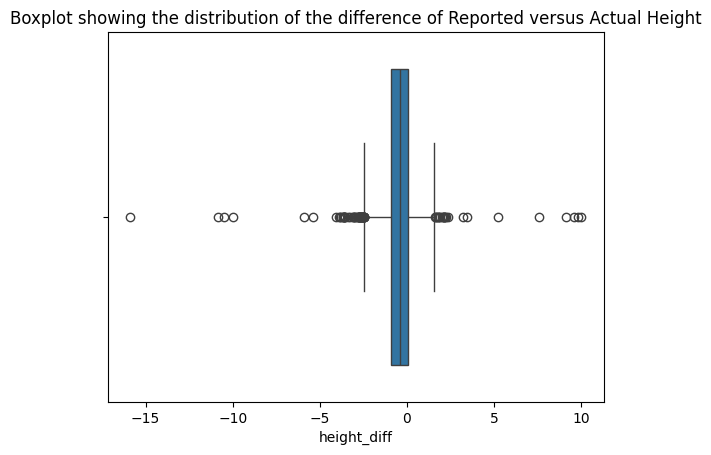

In [551]:
# Plotting the height diff column
sns.boxplot(data=bm, x='height_diff')
plt.title('Boxplot showing the distribution of the difference of Reported versus Actual Height')
plt.show()

In [552]:
# Weight difference outlier count
Q1_h = bm['height_diff'].quantile(0.25)
Q3_h = bm['height_diff'].quantile(0.75)
IQR_h = Q3_h - Q1_h

lower_bound_h = Q1_h - 1.5 * IQR_h
upper_bound_h = Q3_h + 1.5 * IQR_h

outliers_h = bm[
    (bm['height_diff'] < lower_bound_h) |
    (bm['height_diff'] > upper_bound_h)
]

num_outliers_h = outliers_h.shape[0]
print(f"Number of outliers: {num_outliers_h}")

Number of outliers: 70


In [553]:
# Checking the differences between actually measured height and reported height to distinguish participant awareness.
bm['weight_diff'] = bm['weight'] - bm['reported_weight']
bm['weight_diff'].describe()

count    2347.000000
mean        2.393421
std         6.448182
min       -39.500000
25%        -0.880000
50%         1.760000
75%         4.630000
max        99.000000
Name: weight_diff, dtype: float64

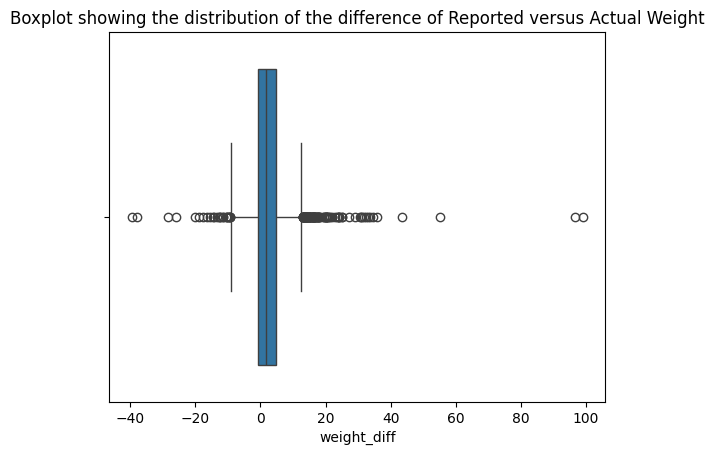

In [554]:
# Plotting the weight diff column
sns.boxplot(data=bm, x='weight_diff')
plt.title('Boxplot showing the distribution of the difference of Reported versus Actual Weight')
plt.show()

In [555]:
# Weight difference outlier count
Q1_w = bm['weight_diff'].quantile(0.25)
Q3_w = bm['weight_diff'].quantile(0.75)
IQR_w = Q3_w - Q1_w

lower_bound_w = Q1_w - 1.5 * IQR_w
upper_bound_w = Q3_w + 1.5 * IQR_w

outliers_w = bm[
    (bm['weight_diff'] < lower_bound_w) |
    (bm['weight_diff'] > upper_bound_w)
]

num_outliers_w = outliers_w.shape[0]
print(f"Number of outliers: {num_outliers_w}")

Number of outliers: 120


In [556]:
# Checking the columns
bm.columns

Index(['index', 'Unnamed: 0', 'age', 'num_children', 'gender',
       'reported_height', 'reported_weight', 'reported_pants_size_waist',
       'reported_pants_size_inseam', 'bra_size_chest', 'bra_size_cup',
       'age_range', 'shoe_size_us', 'ankle_circum', 'spine_to_scye_len',
       'spine_to_elbow_len', 'arm_len_spine_wrist', 'arm_len_shoulder_wrist',
       'arm_len_shoulder_elbow', 'scye_circum', 'chest_circum',
       'chest_circum_below_bust', 'chest_circum_scye', 'jean_inseam',
       'hand_len', 'hip_circum', 'hip_height', 'neck_circum_base',
       'bideltoid_breadth', 'height', 'thigh_circum_proximal', 'u_crotch',
       'waist_circum_preferred', 'waist_height_preferred', 'weight',
       'biacromial_breadth', 'bicristal_breadth', 'bust_to_bust',
       'cervical_height', 'chest_height', 'interscye_dist', 'acromion_height',
       'acromion_radial_len', 'ankle_height_inside', 'ankle_height_outside',
       'axilla_height', 'elbow_height', 'knee_height', 'radial_stylion_len

In [557]:
# Skirt measurement is also heavily dependent on lower-body measurements, we will keep only lower-body measurements best for skirt drafting
bm_skirt = bm[['age','age_range','waist_circum_preferred', 'hip_circum', 'hip_height', 'knee_height', 
               'waist_height_preferred', 'thigh_circum_proximal','bicristal_breadth', 'u_crotch', 'height', 'weight']]
bm_skirt

,age,age_range,waist_circum_preferred,hip_circum,hip_height,knee_height,waist_height_preferred,thigh_circum_proximal,bicristal_breadth,u_crotch,height,weight
6,27.0,26-35,29.49,39.76,31.14,18.110,39.21,22.76,11.73,24.61,65.00,127.5
7,41.0,36-45,30.79,41.18,30.59,18.230,40.51,24.61,12.52,28.35,65.55,159.0
9,48.0,46-55,27.56,41.34,30.00,16.970,39.96,24.57,10.98,28.54,64.21,146.5
10,42.0,36-45,27.32,41.57,32.48,18.940,43.03,24.41,11.42,29.69,66.73,155.5
11,32.0,26-35,28.31,39.49,31.61,17.675,40.71,21.93,NaN,27.80,64.37,128.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4459,29.0,26-35,34.61,44.45,30.20,16.300,38.82,26.02,13.55,29.72,63.39,175.0
4460,35.0,26-35,24.25,36.65,27.48,15.790,36.54,20.91,10.61,25.91,60.16,108.5
4461,40.0,36-45,29.06,39.53,32.91,17.990,41.18,23.74,NaN,27.20,66.38,149.0
4462,23.0,17-25,30.71,43.19,33.94,18.660,40.91,25.63,11.79,24.33,66.34,162.5


In [558]:
# Finding data-types of bm_skirt
bm_skirt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2352 entries, 6 to 4464
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2350 non-null   float64
 1   age_range               2350 non-null   object 
 2   waist_circum_preferred  2348 non-null   float64
 3   hip_circum              2346 non-null   float64
 4   hip_height              2348 non-null   float64
 5   knee_height             2273 non-null   float64
 6   waist_height_preferred  2349 non-null   float64
 7   thigh_circum_proximal   2347 non-null   float64
 8   bicristal_breadth       2269 non-null   float64
 9   u_crotch                2347 non-null   float64
 10  height                  2352 non-null   float64
 11  weight                  2352 non-null   float64
dtypes: float64(11), object(1)
memory usage: 238.9+ KB


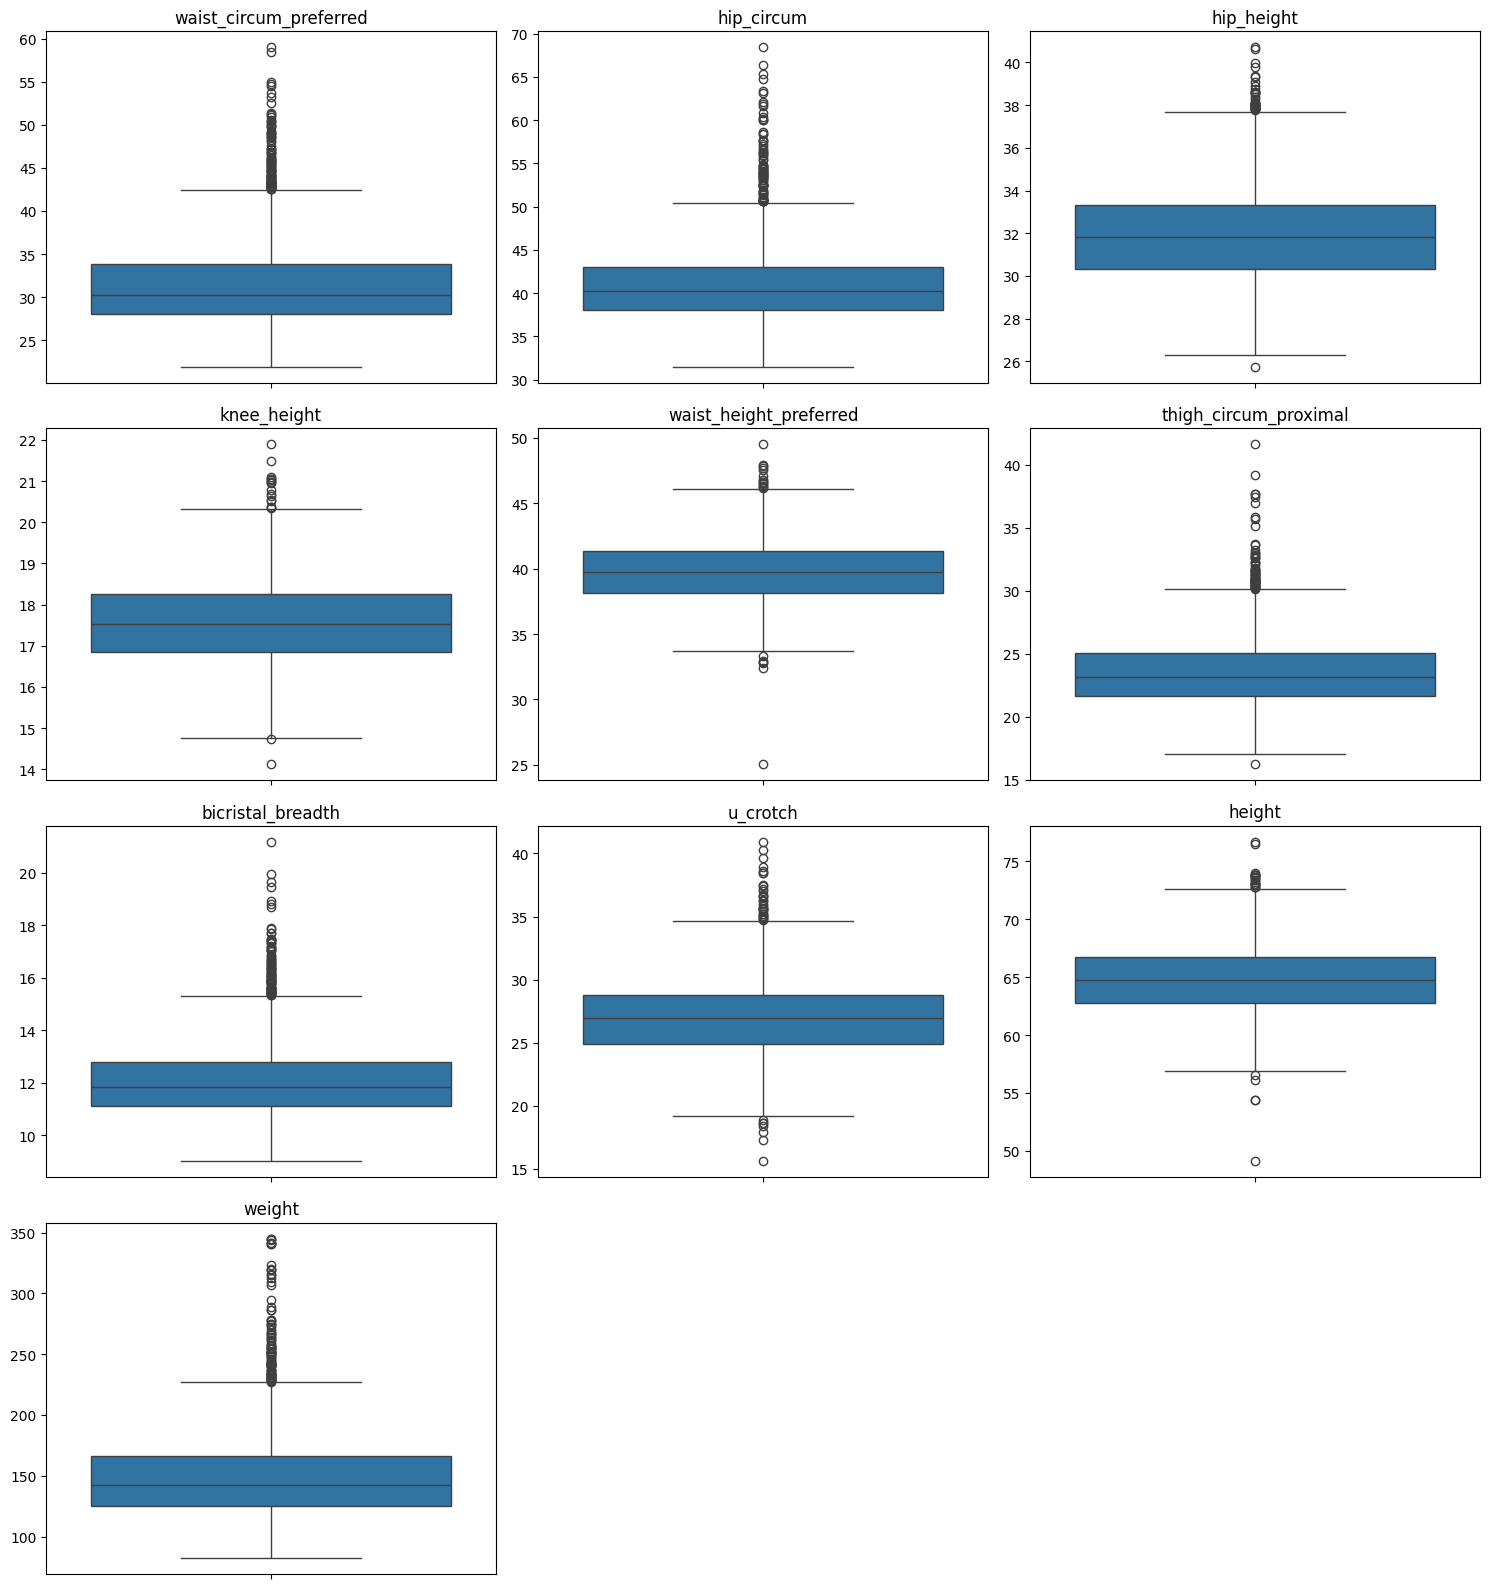

In [559]:
# Using boxplots for outlier analysis over anthropometric measures

cols = [
    'waist_circum_preferred', 'hip_circum', 'hip_height', 'knee_height',
    'waist_height_preferred', 'thigh_circum_proximal',
    'bicristal_breadth', 'u_crotch', 'height', 'weight'
]

n_cols = 3                          # number of plots per row
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=bm[col])
    plt.title(col)
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

In [560]:
# Check for null values
bm_skirt.isna().sum()

age                        2
age_range                  2
waist_circum_preferred     4
hip_circum                 6
hip_height                 4
knee_height               79
waist_height_preferred     3
thigh_circum_proximal      5
bicristal_breadth         83
u_crotch                   5
height                     0
weight                     0
dtype: int64

<Axes: >

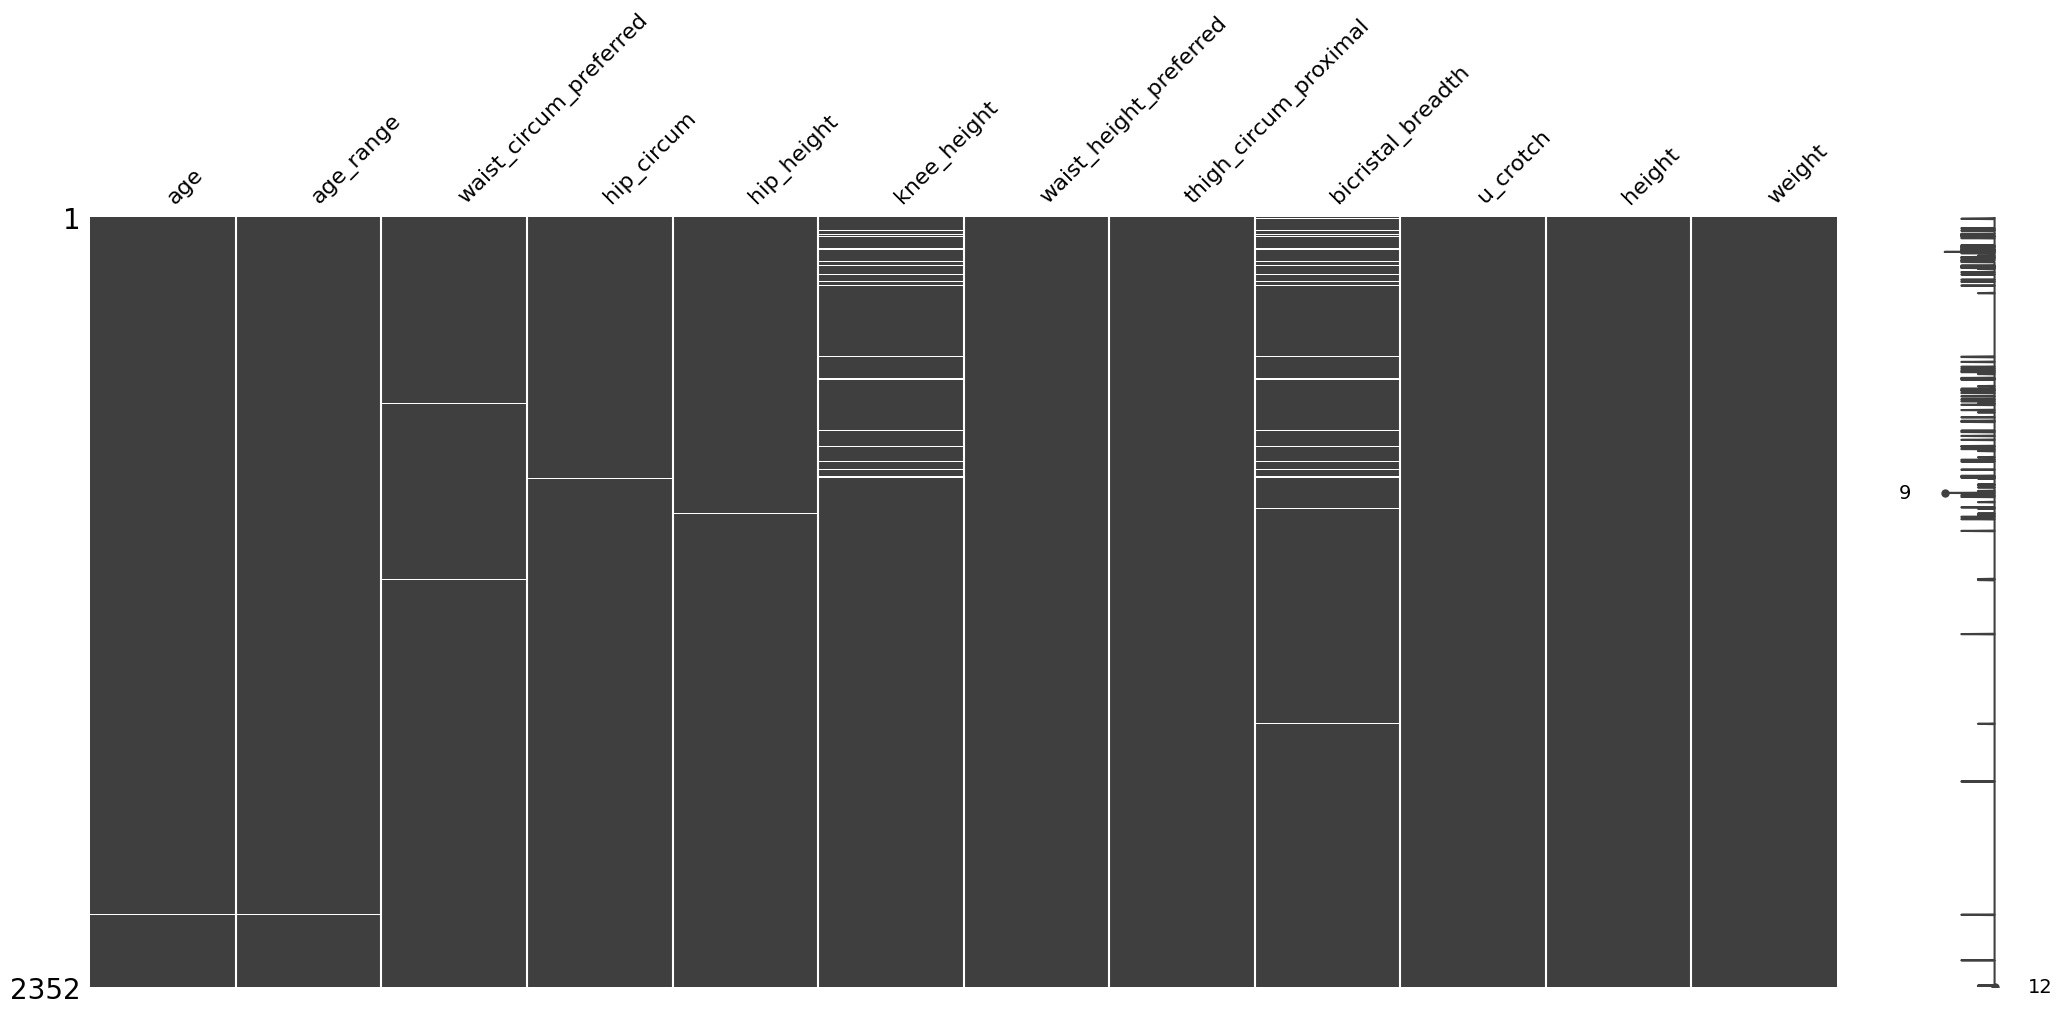

In [561]:
# Checking the relatability of the null values
import missingno as msno
msno.matrix(bm_skirt)

<Axes: >

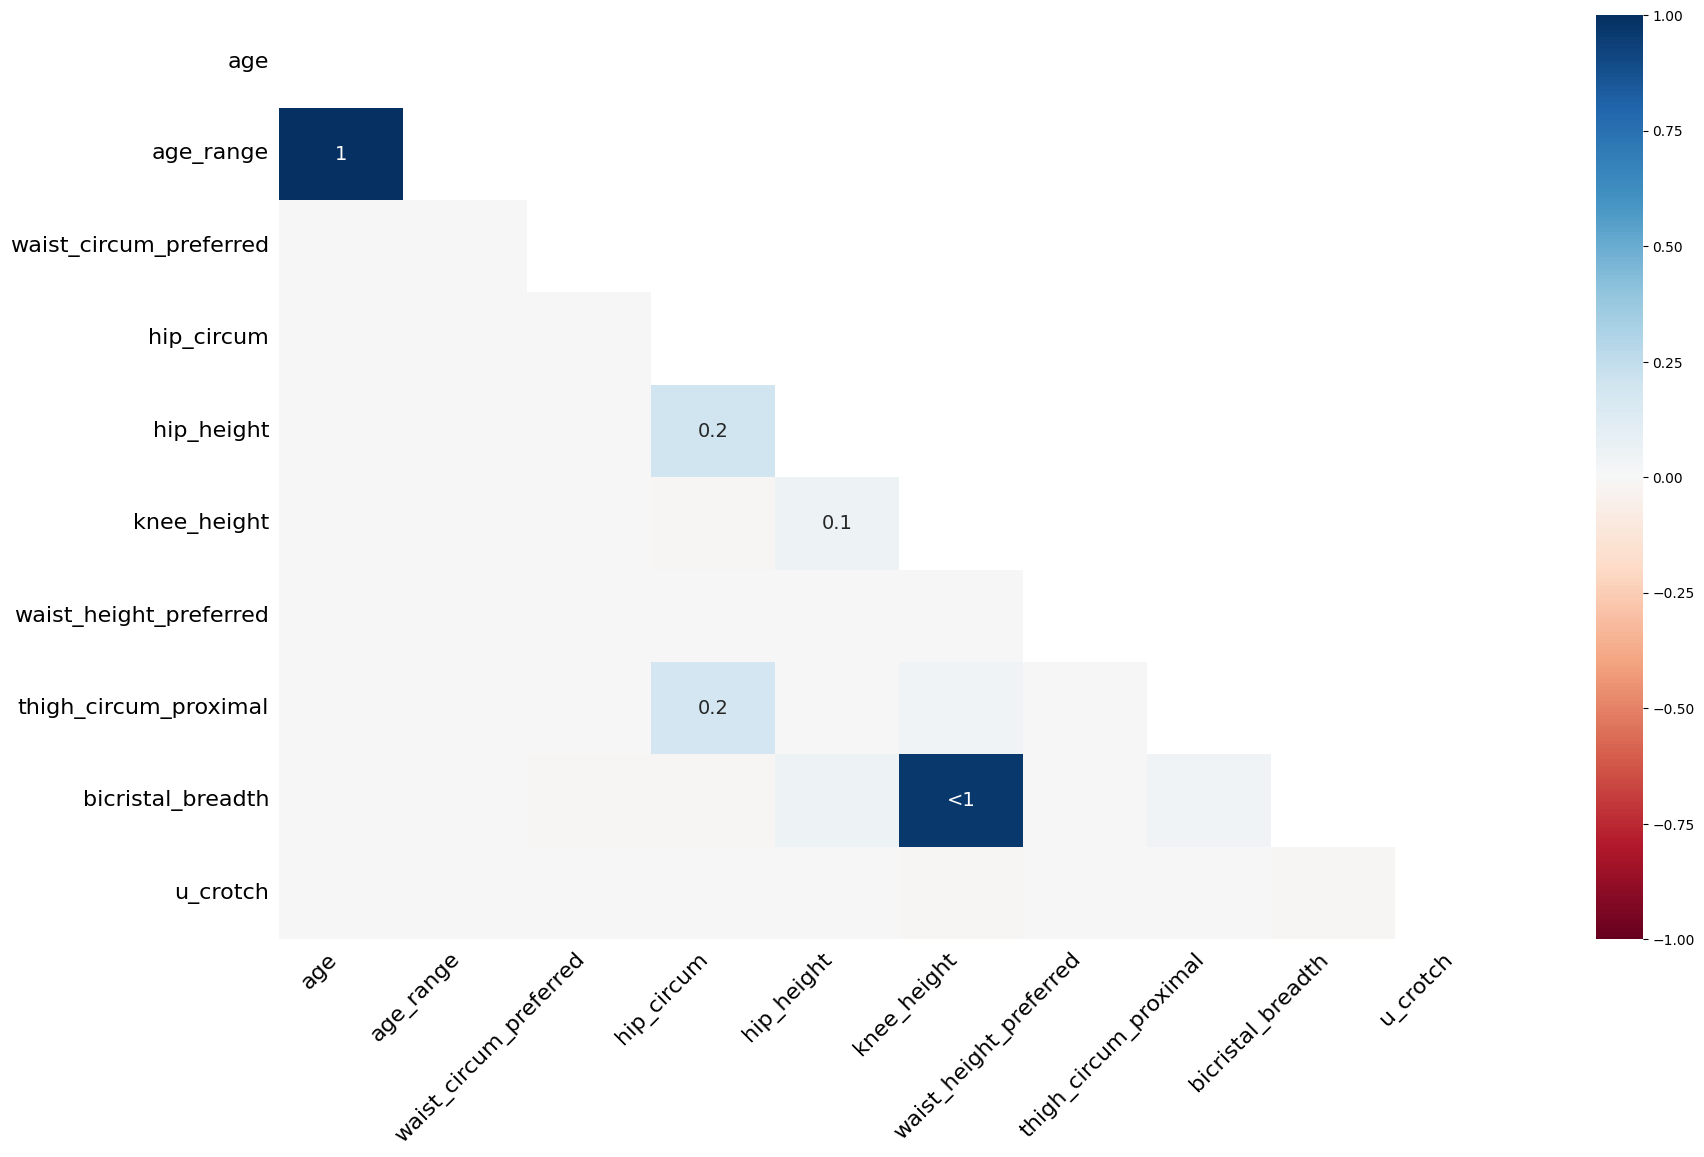

In [562]:
msno.heatmap(bm_skirt)

- The missingness relationship between bicristal_breath and knee_height is determined to be 'Missing Not at Random'. Simple imputation and statistical analysis may result in bias.

- Since we have the hip_circumference which is a more elaborate measure for hip fit, we will drop the 'bicristal_breath measurement' column. We will also drop the participants who do not have knee-length measurements since it is a critical measurement for the derivation of other measurements.

- The thigh_circum_proximal, hip_height and hip_circum have a relationship that is Missing at Random. It is beneficial to use simple imputation because statistical analysis at this point may introduce bias.

- The rest of the variables have a relationship that is Missing Completely at Random and we can therefore safely remove these values if necessary.

In [563]:
# Waist measurements is the most important measument for skirt measurement
bm_skirt = bm_skirt.dropna(subset=['waist_circum_preferred'])
bm_skirt

,age,age_range,waist_circum_preferred,hip_circum,hip_height,knee_height,waist_height_preferred,thigh_circum_proximal,bicristal_breadth,u_crotch,height,weight
6,27.0,26-35,29.49,39.76,31.14,18.110,39.21,22.76,11.73,24.61,65.00,127.5
7,41.0,36-45,30.79,41.18,30.59,18.230,40.51,24.61,12.52,28.35,65.55,159.0
9,48.0,46-55,27.56,41.34,30.00,16.970,39.96,24.57,10.98,28.54,64.21,146.5
10,42.0,36-45,27.32,41.57,32.48,18.940,43.03,24.41,11.42,29.69,66.73,155.5
11,32.0,26-35,28.31,39.49,31.61,17.675,40.71,21.93,NaN,27.80,64.37,128.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4459,29.0,26-35,34.61,44.45,30.20,16.300,38.82,26.02,13.55,29.72,63.39,175.0
4460,35.0,26-35,24.25,36.65,27.48,15.790,36.54,20.91,10.61,25.91,60.16,108.5
4461,40.0,36-45,29.06,39.53,32.91,17.990,41.18,23.74,NaN,27.20,66.38,149.0
4462,23.0,17-25,30.71,43.19,33.94,18.660,40.91,25.63,11.79,24.33,66.34,162.5


In [564]:
# Dropping those without height from waist to floor.
bm_skirt = bm_skirt.dropna(subset=['waist_height_preferred'])
bm_skirt



,age,age_range,waist_circum_preferred,hip_circum,hip_height,knee_height,waist_height_preferred,thigh_circum_proximal,bicristal_breadth,u_crotch,height,weight
6,27.0,26-35,29.49,39.76,31.14,18.110,39.21,22.76,11.73,24.61,65.00,127.5
7,41.0,36-45,30.79,41.18,30.59,18.230,40.51,24.61,12.52,28.35,65.55,159.0
9,48.0,46-55,27.56,41.34,30.00,16.970,39.96,24.57,10.98,28.54,64.21,146.5
10,42.0,36-45,27.32,41.57,32.48,18.940,43.03,24.41,11.42,29.69,66.73,155.5
11,32.0,26-35,28.31,39.49,31.61,17.675,40.71,21.93,NaN,27.80,64.37,128.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4459,29.0,26-35,34.61,44.45,30.20,16.300,38.82,26.02,13.55,29.72,63.39,175.0
4460,35.0,26-35,24.25,36.65,27.48,15.790,36.54,20.91,10.61,25.91,60.16,108.5
4461,40.0,36-45,29.06,39.53,32.91,17.990,41.18,23.74,NaN,27.20,66.38,149.0
4462,23.0,17-25,30.71,43.19,33.94,18.660,40.91,25.63,11.79,24.33,66.34,162.5


In [565]:
# Dropping those without hip circumference
bm_skirt = bm_skirt.dropna(subset=['hip_circum'])
bm_skirt

,age,age_range,waist_circum_preferred,hip_circum,hip_height,knee_height,waist_height_preferred,thigh_circum_proximal,bicristal_breadth,u_crotch,height,weight
6,27.0,26-35,29.49,39.76,31.14,18.110,39.21,22.76,11.73,24.61,65.00,127.5
7,41.0,36-45,30.79,41.18,30.59,18.230,40.51,24.61,12.52,28.35,65.55,159.0
9,48.0,46-55,27.56,41.34,30.00,16.970,39.96,24.57,10.98,28.54,64.21,146.5
10,42.0,36-45,27.32,41.57,32.48,18.940,43.03,24.41,11.42,29.69,66.73,155.5
11,32.0,26-35,28.31,39.49,31.61,17.675,40.71,21.93,NaN,27.80,64.37,128.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4459,29.0,26-35,34.61,44.45,30.20,16.300,38.82,26.02,13.55,29.72,63.39,175.0
4460,35.0,26-35,24.25,36.65,27.48,15.790,36.54,20.91,10.61,25.91,60.16,108.5
4461,40.0,36-45,29.06,39.53,32.91,17.990,41.18,23.74,NaN,27.20,66.38,149.0
4462,23.0,17-25,30.71,43.19,33.94,18.660,40.91,25.63,11.79,24.33,66.34,162.5


In [566]:
# Dropping participants without knee-height
bm_skirt = bm_skirt.dropna(subset=['knee_height'])
bm_skirt

,age,age_range,waist_circum_preferred,hip_circum,hip_height,knee_height,waist_height_preferred,thigh_circum_proximal,bicristal_breadth,u_crotch,height,weight
6,27.0,26-35,29.49,39.76,31.14,18.110,39.21,22.76,11.73,24.61,65.00,127.5
7,41.0,36-45,30.79,41.18,30.59,18.230,40.51,24.61,12.52,28.35,65.55,159.0
9,48.0,46-55,27.56,41.34,30.00,16.970,39.96,24.57,10.98,28.54,64.21,146.5
10,42.0,36-45,27.32,41.57,32.48,18.940,43.03,24.41,11.42,29.69,66.73,155.5
11,32.0,26-35,28.31,39.49,31.61,17.675,40.71,21.93,NaN,27.80,64.37,128.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4459,29.0,26-35,34.61,44.45,30.20,16.300,38.82,26.02,13.55,29.72,63.39,175.0
4460,35.0,26-35,24.25,36.65,27.48,15.790,36.54,20.91,10.61,25.91,60.16,108.5
4461,40.0,36-45,29.06,39.53,32.91,17.990,41.18,23.74,NaN,27.20,66.38,149.0
4462,23.0,17-25,30.71,43.19,33.94,18.660,40.91,25.63,11.79,24.33,66.34,162.5


In [567]:
# Dropping the hip_height nulls
bm_skirt = bm_skirt.dropna(subset=['hip_height'])
bm_skirt

,age,age_range,waist_circum_preferred,hip_circum,hip_height,knee_height,waist_height_preferred,thigh_circum_proximal,bicristal_breadth,u_crotch,height,weight
6,27.0,26-35,29.49,39.76,31.14,18.110,39.21,22.76,11.73,24.61,65.00,127.5
7,41.0,36-45,30.79,41.18,30.59,18.230,40.51,24.61,12.52,28.35,65.55,159.0
9,48.0,46-55,27.56,41.34,30.00,16.970,39.96,24.57,10.98,28.54,64.21,146.5
10,42.0,36-45,27.32,41.57,32.48,18.940,43.03,24.41,11.42,29.69,66.73,155.5
11,32.0,26-35,28.31,39.49,31.61,17.675,40.71,21.93,NaN,27.80,64.37,128.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4459,29.0,26-35,34.61,44.45,30.20,16.300,38.82,26.02,13.55,29.72,63.39,175.0
4460,35.0,26-35,24.25,36.65,27.48,15.790,36.54,20.91,10.61,25.91,60.16,108.5
4461,40.0,36-45,29.06,39.53,32.91,17.990,41.18,23.74,NaN,27.20,66.38,149.0
4462,23.0,17-25,30.71,43.19,33.94,18.660,40.91,25.63,11.79,24.33,66.34,162.5


In [568]:
bm_skirt = bm_skirt.drop('bicristal_breadth', axis=1)
bm_skirt

,age,age_range,waist_circum_preferred,hip_circum,hip_height,knee_height,waist_height_preferred,thigh_circum_proximal,u_crotch,height,weight
6,27.0,26-35,29.49,39.76,31.14,18.110,39.21,22.76,24.61,65.00,127.5
7,41.0,36-45,30.79,41.18,30.59,18.230,40.51,24.61,28.35,65.55,159.0
9,48.0,46-55,27.56,41.34,30.00,16.970,39.96,24.57,28.54,64.21,146.5
10,42.0,36-45,27.32,41.57,32.48,18.940,43.03,24.41,29.69,66.73,155.5
11,32.0,26-35,28.31,39.49,31.61,17.675,40.71,21.93,27.80,64.37,128.5
...,...,...,...,...,...,...,...,...,...,...,...
4459,29.0,26-35,34.61,44.45,30.20,16.300,38.82,26.02,29.72,63.39,175.0
4460,35.0,26-35,24.25,36.65,27.48,15.790,36.54,20.91,25.91,60.16,108.5
4461,40.0,36-45,29.06,39.53,32.91,17.990,41.18,23.74,27.20,66.38,149.0
4462,23.0,17-25,30.71,43.19,33.94,18.660,40.91,25.63,24.33,66.34,162.5


In [569]:
bm_skirt.isna().sum()

age                       2
age_range                 2
waist_circum_preferred    0
hip_circum                0
hip_height                0
knee_height               0
waist_height_preferred    0
thigh_circum_proximal     3
u_crotch                  5
height                    0
weight                    0
dtype: int64

<Axes: >

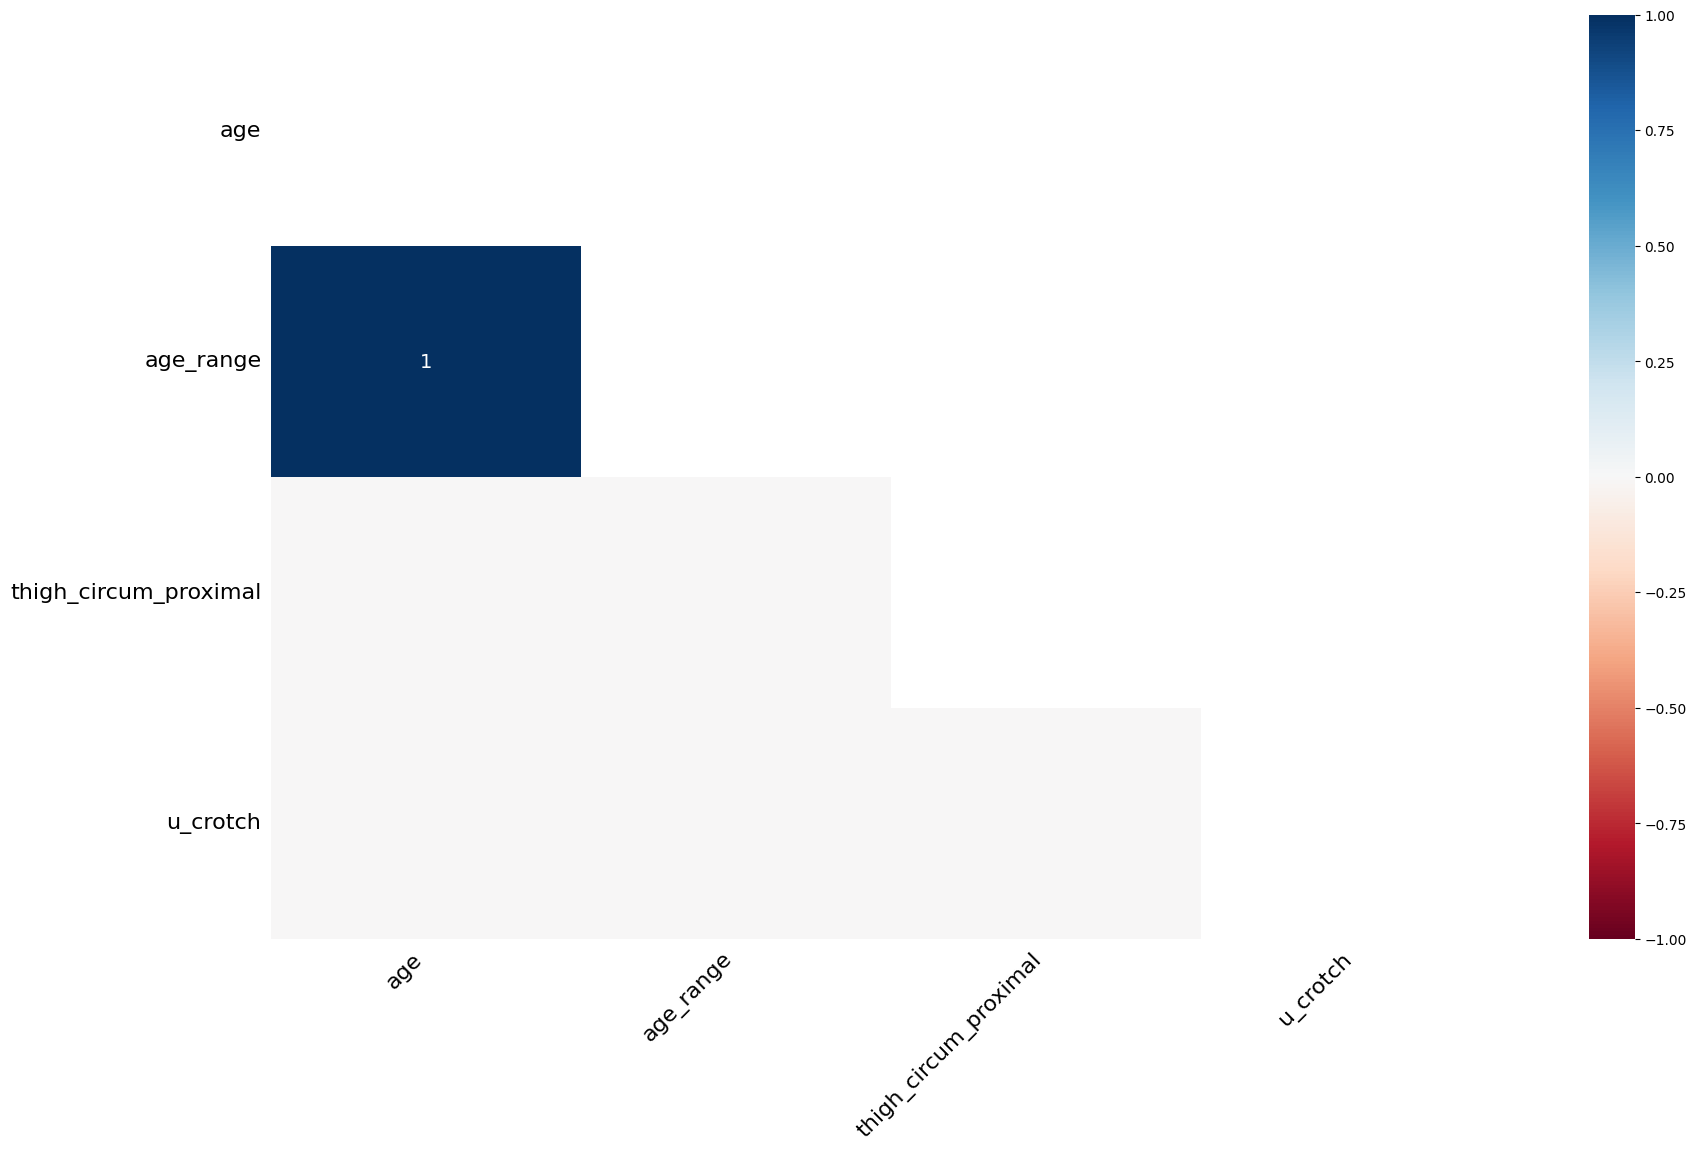

In [570]:
msno.heatmap(bm_skirt)

In [571]:
# Checking to see if there are duplicates
bm_skirt.duplicated().value_counts()

False    2258
Name: count, dtype: int64

### Feature Engineering
Converting the anthometric length data to skirt lengths types.

| Skirt Length        | Description                                                                                 |
|---------------------|---------------------------------------------------------------------------------------------|
| Micro Mini          | Extremely short skirt, typically ending **well above mid-thigh**; often the shortest style. |
| Mini Skirt          | Short skirt ending **mid-thigh or higher**, offering a youthful, playful silhouette.        |
| Above-Knee Skirt    | Skirt hem falls **slightly above the knee**, modest but still short.                         |
| Knee-Length Skirt   | Hem ends **at the knee**, classic and versatile for casual, work, or formal settings.       |
| Below-Knee Skirt    | Hem ends **just below the kneecap**, typically ending 1–3 inches (2.5–7.5 cm) under the knee       |
| Midi Skirt          | Skirt ends **mid-calf**, usually between knee and ankle; elegant and modest.                |
| Tea-Length Skirt    | Falls **just above the ankle**; often used in semi-formal dresses.                          |
| Maxi Skirt          | Skirt extends **to the ankle**, flowing and comfortable.                                    |
| Floor-Length Skirt  | Hem touches or grazes **the floor**; common in formal wear and gowns.                       |


![Dress silhouette chart](https://blog.treasurie.com/wp-content/uploads/skirt-lengths-00.jpg)

In [572]:
# Creating a waist to hip length feature
bm_skirt['waist_hip_length'] = bm_skirt['waist_height_preferred'] - bm_skirt['hip_height']
bm_skirt

,age,age_range,waist_circum_preferred,hip_circum,hip_height,knee_height,waist_height_preferred,thigh_circum_proximal,u_crotch,height,weight,waist_hip_length
6,27.0,26-35,29.49,39.76,31.14,18.110,39.21,22.76,24.61,65.00,127.5,8.07
7,41.0,36-45,30.79,41.18,30.59,18.230,40.51,24.61,28.35,65.55,159.0,9.92
9,48.0,46-55,27.56,41.34,30.00,16.970,39.96,24.57,28.54,64.21,146.5,9.96
10,42.0,36-45,27.32,41.57,32.48,18.940,43.03,24.41,29.69,66.73,155.5,10.55
11,32.0,26-35,28.31,39.49,31.61,17.675,40.71,21.93,27.80,64.37,128.5,9.10
...,...,...,...,...,...,...,...,...,...,...,...,...
4459,29.0,26-35,34.61,44.45,30.20,16.300,38.82,26.02,29.72,63.39,175.0,8.62
4460,35.0,26-35,24.25,36.65,27.48,15.790,36.54,20.91,25.91,60.16,108.5,9.06
4461,40.0,36-45,29.06,39.53,32.91,17.990,41.18,23.74,27.20,66.38,149.0,8.27
4462,23.0,17-25,30.71,43.19,33.94,18.660,40.91,25.63,24.33,66.34,162.5,6.97


In [573]:
# Creating a waist to knee length feature for knee-length skirt
bm_skirt['knee_length'] = bm_skirt['waist_height_preferred'] - bm_skirt['knee_height']
bm_skirt

,age,age_range,waist_circum_preferred,hip_circum,hip_height,knee_height,waist_height_preferred,thigh_circum_proximal,u_crotch,height,weight,waist_hip_length,knee_length
6,27.0,26-35,29.49,39.76,31.14,18.110,39.21,22.76,24.61,65.00,127.5,8.07,21.100
7,41.0,36-45,30.79,41.18,30.59,18.230,40.51,24.61,28.35,65.55,159.0,9.92,22.280
9,48.0,46-55,27.56,41.34,30.00,16.970,39.96,24.57,28.54,64.21,146.5,9.96,22.990
10,42.0,36-45,27.32,41.57,32.48,18.940,43.03,24.41,29.69,66.73,155.5,10.55,24.090
11,32.0,26-35,28.31,39.49,31.61,17.675,40.71,21.93,27.80,64.37,128.5,9.10,23.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,29.0,26-35,34.61,44.45,30.20,16.300,38.82,26.02,29.72,63.39,175.0,8.62,22.520
4460,35.0,26-35,24.25,36.65,27.48,15.790,36.54,20.91,25.91,60.16,108.5,9.06,20.750
4461,40.0,36-45,29.06,39.53,32.91,17.990,41.18,23.74,27.20,66.38,149.0,8.27,23.190
4462,23.0,17-25,30.71,43.19,33.94,18.660,40.91,25.63,24.33,66.34,162.5,6.97,22.250


In [574]:
# Creating the micro-mini, mini_skirt and above knee length feature
bm_skirt['micro_mini_length'] = bm_skirt['knee_length'] * 0.5
bm_skirt['mini_length'] = bm_skirt['knee_length'] * 0.75
bm_skirt['above_knee'] = bm_skirt['knee_length'] - 2
bm_skirt['below_knee'] = bm_skirt['knee_length'] + 2
bm_skirt['midi_length'] = bm_skirt['knee_length'] * 1.5
bm_skirt['tea_length'] = bm_skirt['knee_length'] * 1.75
bm_skirt['maxi_length'] = bm_skirt['waist_height_preferred'] * 0.9
bm_skirt['full_length'] = bm_skirt['waist_height_preferred']



In [575]:
# Creating a radius from the waist circumference.
bm_skirt['radius'] = bm_skirt['waist_circum_preferred'] / (2 * np.pi)

In [576]:
bm_skirt = bm_skirt.drop('waist_height_preferred', axis=1)
bm_skirt

,age,age_range,waist_circum_preferred,hip_circum,hip_height,knee_height,thigh_circum_proximal,u_crotch,height,weight,...,knee_length,micro_mini_length,mini_length,above_knee,below_knee,midi_length,tea_length,maxi_length,full_length,radius
6,27.0,26-35,29.49,39.76,31.14,18.110,22.76,24.61,65.00,127.5,...,21.100,10.5500,15.82500,19.100,23.100,31.6500,36.92500,35.289,39.21,4.693479
7,41.0,36-45,30.79,41.18,30.59,18.230,24.61,28.35,65.55,159.0,...,22.280,11.1400,16.71000,20.280,24.280,33.4200,38.99000,36.459,40.51,4.900381
9,48.0,46-55,27.56,41.34,30.00,16.970,24.57,28.54,64.21,146.5,...,22.990,11.4950,17.24250,20.990,24.990,34.4850,40.23250,35.964,39.96,4.386310
10,42.0,36-45,27.32,41.57,32.48,18.940,24.41,29.69,66.73,155.5,...,24.090,12.0450,18.06750,22.090,26.090,36.1350,42.15750,38.727,43.03,4.348113
11,32.0,26-35,28.31,39.49,31.61,17.675,21.93,27.80,64.37,128.5,...,23.035,11.5175,17.27625,21.035,25.035,34.5525,40.31125,36.639,40.71,4.505676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,29.0,26-35,34.61,44.45,30.20,16.300,26.02,29.72,63.39,175.0,...,22.520,11.2600,16.89000,20.520,24.520,33.7800,39.41000,34.938,38.82,5.508353
4460,35.0,26-35,24.25,36.65,27.48,15.790,20.91,25.91,60.16,108.5,...,20.750,10.3750,15.56250,18.750,22.750,31.1250,36.31250,32.886,36.54,3.859507
4461,40.0,36-45,29.06,39.53,32.91,17.990,23.74,27.20,66.38,149.0,...,23.190,11.5950,17.39250,21.190,25.190,34.7850,40.58250,37.062,41.18,4.625043
4462,23.0,17-25,30.71,43.19,33.94,18.660,25.63,24.33,66.34,162.5,...,22.250,11.1250,16.68750,20.250,24.250,33.3750,38.93750,36.819,40.91,4.887648


## EDA (Demographic Factors)

##### Descriptive Statistics

In [577]:
# Finding the descriptive statistics
bm_skirt.describe()

,age,waist_circum_preferred,hip_circum,hip_height,knee_height,thigh_circum_proximal,u_crotch,height,weight,waist_hip_length,knee_length,micro_mini_length,mini_length,above_knee,below_knee,midi_length,tea_length,maxi_length,full_length,radius
count,2256.000000,2258.000000,2258.000000,2258.000000,2258.000000,2255.000000,2253.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000,2258.000000
mean,37.932624,31.394553,41.026851,31.945186,17.573492,23.570647,26.870768,64.783702,149.827431,7.783158,22.154852,11.077426,16.616139,20.154852,24.154852,33.232277,38.770990,35.755509,39.728344,4.996598
std,12.817881,5.079075,4.440663,2.266923,1.054681,2.771934,3.163034,2.967954,36.480053,1.640588,1.527965,0.763983,1.145974,1.527965,1.527965,2.291948,2.673939,2.086347,2.318163,0.808360
min,18.000000,21.930000,31.500000,25.750000,14.130000,16.260000,15.630000,49.130000,83.560000,-6.770000,5.790000,2.895000,4.342500,3.790000,7.790000,8.685000,10.132500,22.572000,25.080000,3.490268
25%,26.675000,27.990000,38.030000,30.350000,16.838750,21.650000,24.800000,62.760000,125.000000,7.010000,21.160000,10.580000,15.870000,19.160000,23.160000,31.740000,37.030000,34.299000,38.110000,4.454747
50%,37.000000,30.160000,40.200000,31.770000,17.530000,23.110000,26.930000,64.650000,142.000000,8.070000,22.162500,11.081250,16.621875,20.162500,24.162500,33.243750,38.784375,35.748000,39.720000,4.800113
75%,48.000000,33.660000,42.990000,33.310000,18.253750,25.000000,28.780000,66.730000,166.000000,8.860000,23.180000,11.590000,17.385000,21.180000,25.180000,34.770000,40.565000,37.125000,41.250000,5.357155
max,69.000000,58.980000,68.430000,40.710000,21.890000,41.610000,40.940000,76.690000,345.000000,13.350000,28.390000,14.195000,21.292500,26.390000,30.390000,42.585000,49.682500,44.541000,49.490000,9.386959


count    2256.000000
mean       37.932624
std        12.817881
min        18.000000
25%        26.675000
50%        37.000000
75%        48.000000
max        69.000000
Name: age, dtype: float64


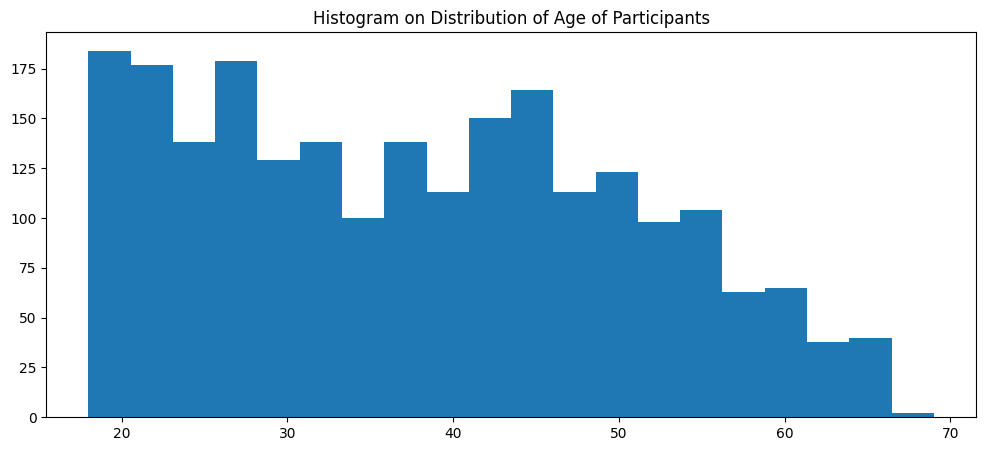

In [578]:
# Descriptive Analysis of the Age of the participants
print(bm_skirt['age'].describe())
plt.figure(figsize=(12,5))
plt.hist(data=bm_skirt, x='age', bins=20)
plt.title('Histogram on Distribution of Age of Participants')
plt.show()


The age value does not have a known distribution

In [579]:
# Age Range Sorting
age_order = [
    '17-25',
    '26-35',
    '36-45',
    '46-55',
    '56-65',
    '66-100'
]

bm_skirt['age_range'] = pd.Categorical(
    bm_skirt['age_range'],
    categories=age_order,
    ordered=True
)

age_range
26-35     543
36-45     516
17-25     504
46-55     455
56-65     233
66-100      5
Name: count, dtype: int64


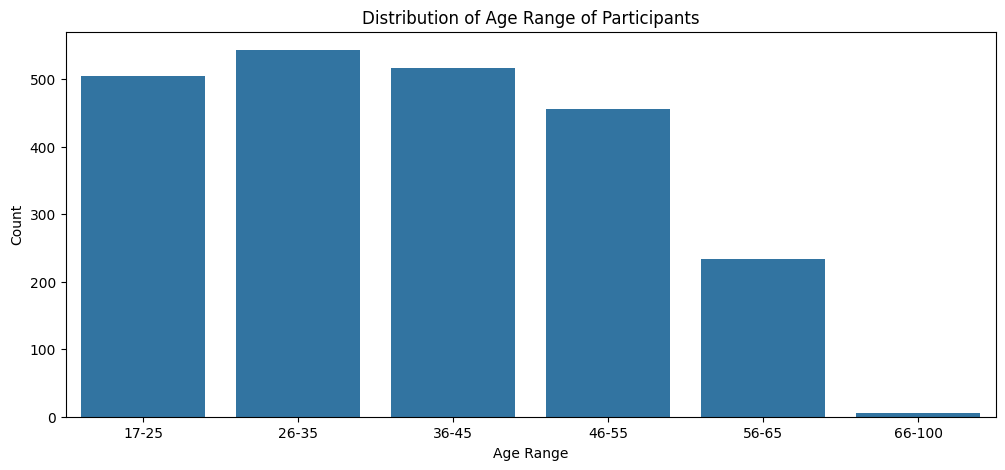

In [580]:
# Descriptive Analysis of the Age range of the participants
print(bm_skirt['age_range'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(data=bm_skirt, x='age_range')
plt.title('Distribution of Age Range of Participants')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

In [581]:
#There seems to be ages recorded as float with decimal points, let's round those off to the nearest whole number.
bm_skirt['age'] = bm_skirt['age'].round(0).astype('Int64')
print(bm_skirt['age'].min())

18


count    2258.000000
mean       64.783702
std         2.967954
min        49.130000
25%        62.760000
50%        64.650000
75%        66.730000
max        76.690000
Name: height, dtype: float64


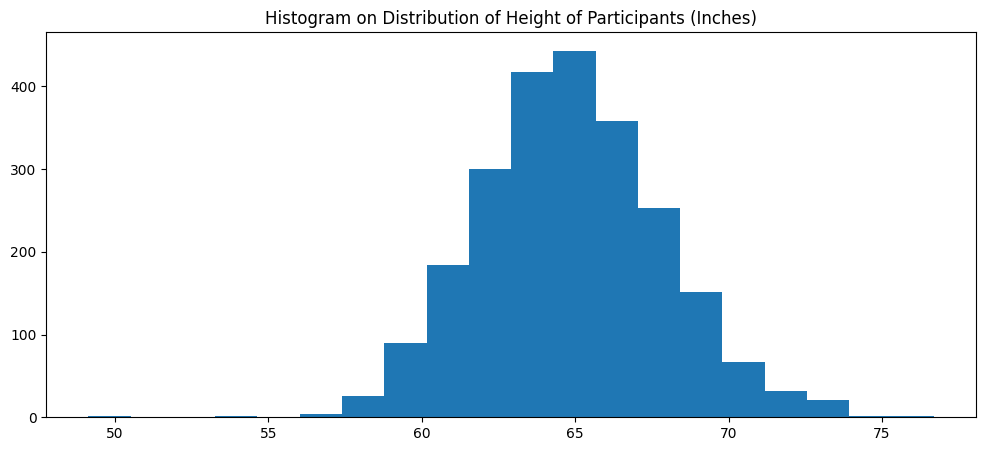

In [582]:
# Checking the reported height distribution
print(bm_skirt['height'].describe())
plt.figure(figsize=(12,5))
plt.hist(data=bm, x='height', bins=20)
plt.title('Histogram on Distribution of Height of Participants (Inches)')
plt.show()

The distribution of height displays a normal distribution with the mean and median being similar. There are also a few outliers.

In [583]:
# converting weight to kgs
bm_skirt['weight_kgs'] = bm_skirt['weight'] / 2.205


count    2258.000000
mean       67.948948
std        16.544242
min        37.895692
25%        56.689342
50%        64.399093
75%        75.283447
max       156.462585
Name: weight_kgs, dtype: float64


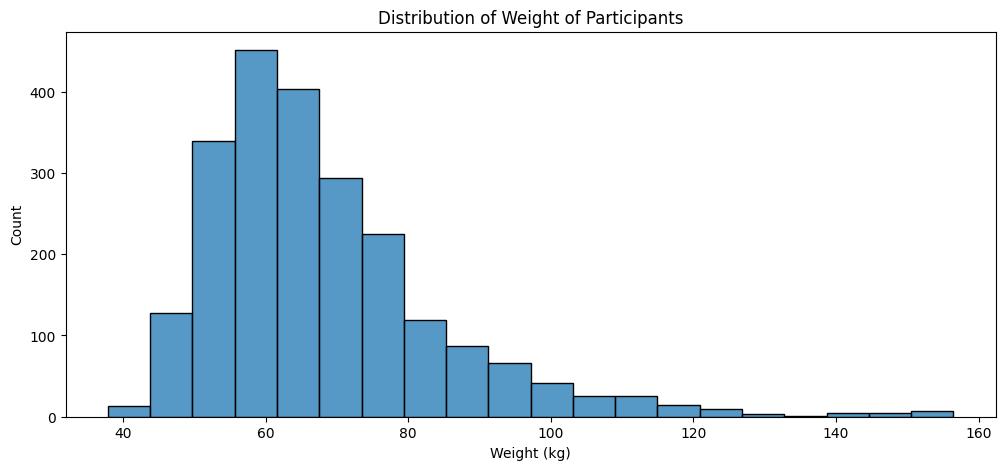

In [584]:
# Checking the reported weight distribution
print(bm_skirt['weight_kgs'].describe())
plt.figure(figsize=(12,5))
sns.histplot(data=bm_skirt, x='weight_kgs', bins=20, kde=False)
plt.title('Distribution of Weight of Participants')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.show()

The distribution of weight of participants is right tailed, there tail extends upto 150kgs.

## EDA (Dimensions)

#### Full, Half and Quarter Circle Skirt

In [585]:
import matplotlib.pyplot as plt
import numpy as np

def draw_concentric_circles_for_random(bm_skirt):
    """
    Draws skirt draft patterns for a random person using:
    - radius (inner waist radius)
    - knee_length (gap between waist & knee)
    - hem: 1 inch
    Adds:
    - Labels
    - Seam lines
    """

    # Random person
    person = bm_skirt.sample(1).iloc[0]

    # Extract measurements
    r_inner = person['radius']
    gap = person['knee_length']
    hem = 1  # inch

    # Radii used
    radii = [
        r_inner + 1,         # waist
        r_inner + gap,       # knee
        r_inner + gap + hem  # hem
    ]

    # Label names for each radius
    radius_labels = ["Waist", "Knee Line", "Hem"]

    # Setup subplots
    fig, axes = plt.subplots(1, 3, figsize=(28, 10))

    
    # 1. Full Circle Skirt
   
    ax = axes[0]
    for r, label in zip(radii, radius_labels):
        circle = plt.Circle((0, 0), r, fill=False, linewidth=2)
        ax.add_patch(circle)

        # Label
        ax.text(r, 0, label, fontsize=10, va='bottom')

        # Seam line (vertical axis)
        ax.plot([0, r], [0, 0], 'k--', linewidth=1)

    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(-radii[-1]-5, radii[-1]+5)
    ax.set_ylim(-radii[-1]-5, radii[-1]+5)
    ax.set_title("Full Circle Draft")

    
    # 2. Half Circle Skirt Draft
    
    ax = axes[1]
    theta = np.linspace(0, np.pi, 300)

    for r, label in zip(radii, radius_labels):
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        ax.plot(x, y, linewidth=2)

        # Label on arc
        ax.text(r * np.cos(np.pi/4), r * np.sin(np.pi/4), label, fontsize=10)

        # Seam lines (straight sides)
        ax.plot([0, r], [0, 0], 'k--')
        ax.plot([0, -r], [0, 0], 'k--')

    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(-radii[-1]-5, radii[-1]+5)
    ax.set_ylim(0, radii[-1]+5)
    ax.set_title("Half Circle Draft")

    
    # 3. Quarter Circle Skirt Draft
    
    ax = axes[2]
    theta = np.linspace(0, np.pi/2, 300)

    for r, label in zip(radii, radius_labels):
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        ax.plot(x, y, linewidth=2)

        # Label
        ax.text(r * np.cos(np.pi/6), r * np.sin(np.pi/6), label, fontsize=10)

        # Seam lines: two straight legs
        ax.plot([0, r], [0, 0], 'k--')
        ax.plot([0, 0], [0, r], 'k--')

    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_xlim(0, radii[-1]+5)
    ax.set_ylim(0, radii[-1]+5)
    ax.set_title("Quarter Circle Draft")

    plt.tight_layout()
    plt.show()


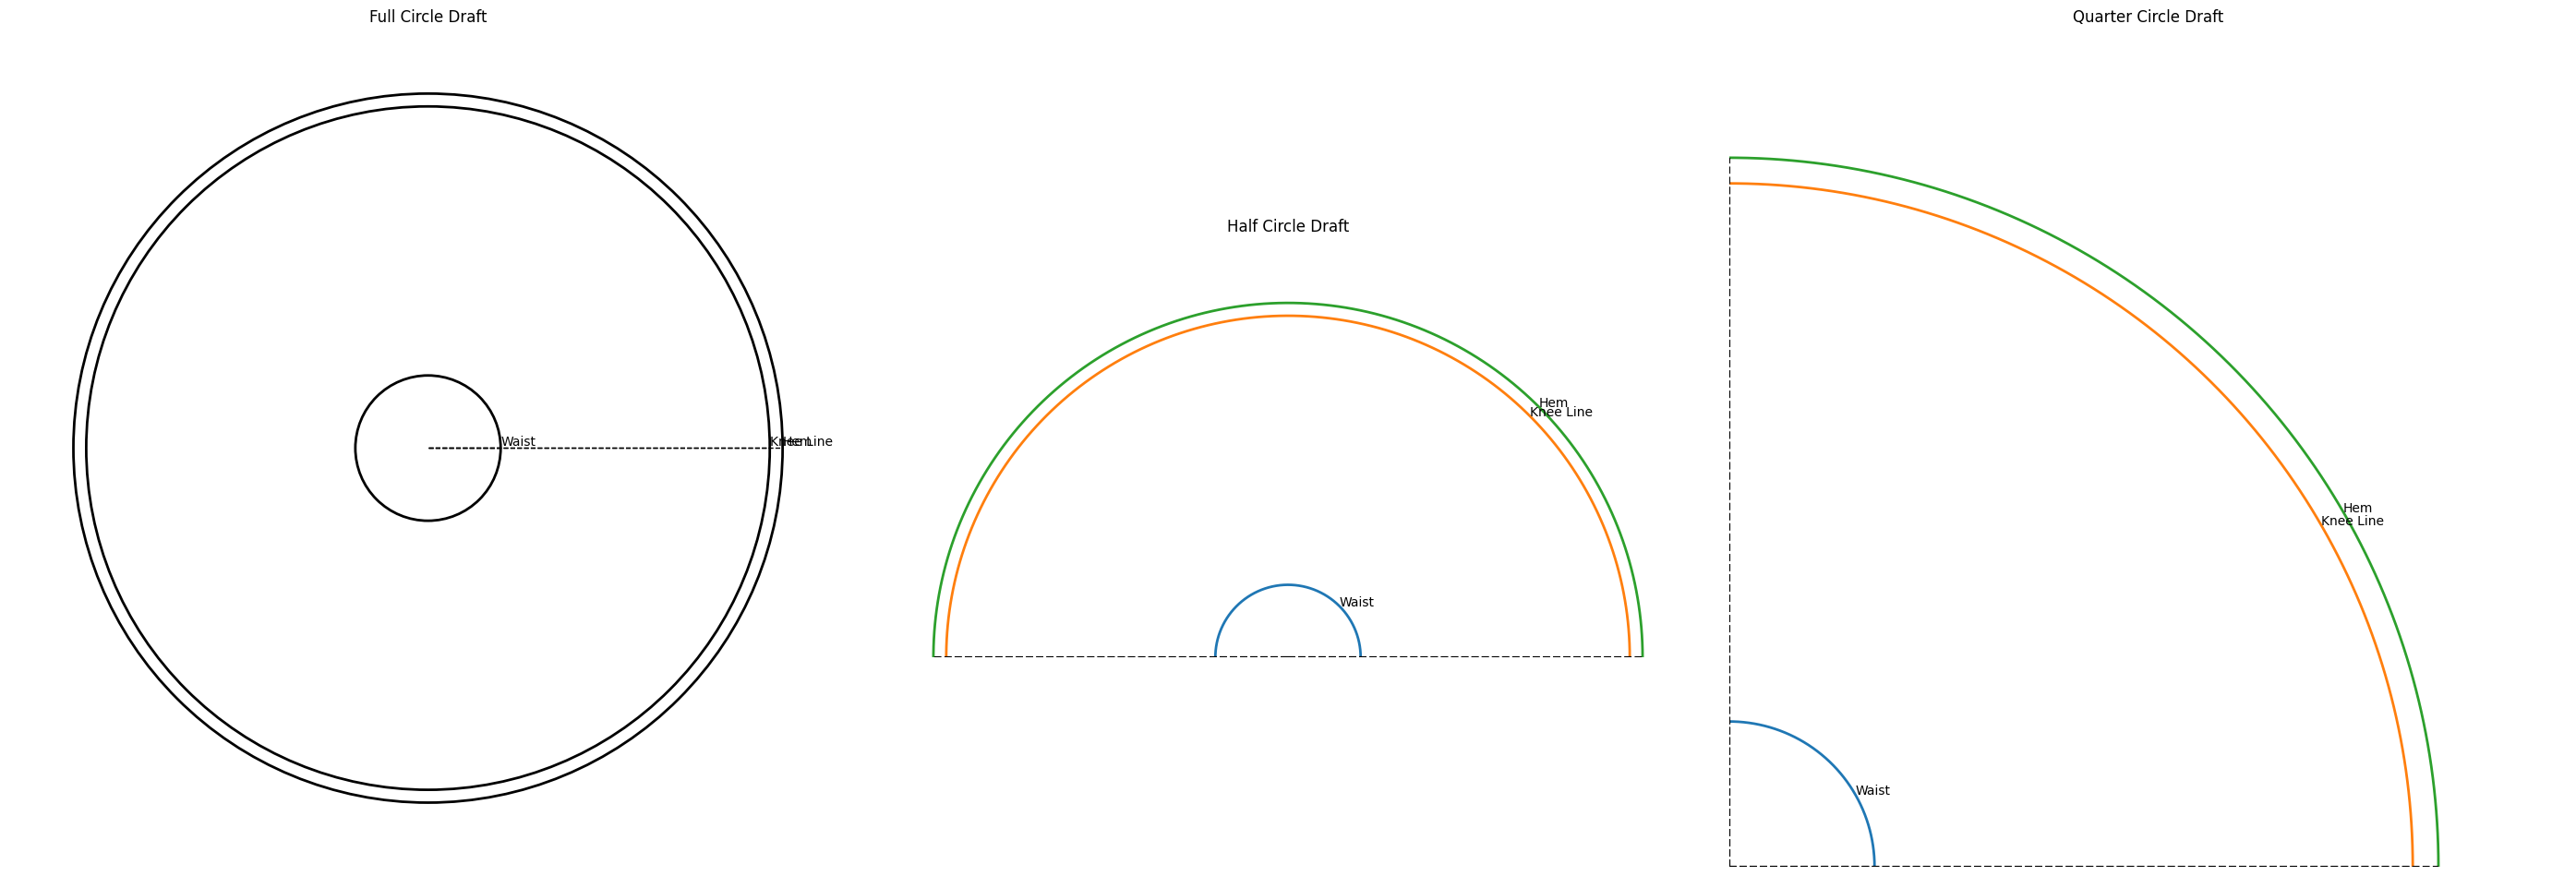

In [586]:
# Calling the function
draw_concentric_circles_for_random(bm_skirt)

![Circle Skirt silhouette chart](![ChatGPT Image Dec 11, 2025, 08_30_26 PM.png](<attachment:ChatGPT Image Dec 11, 2025, 08_30_26 PM.png>))
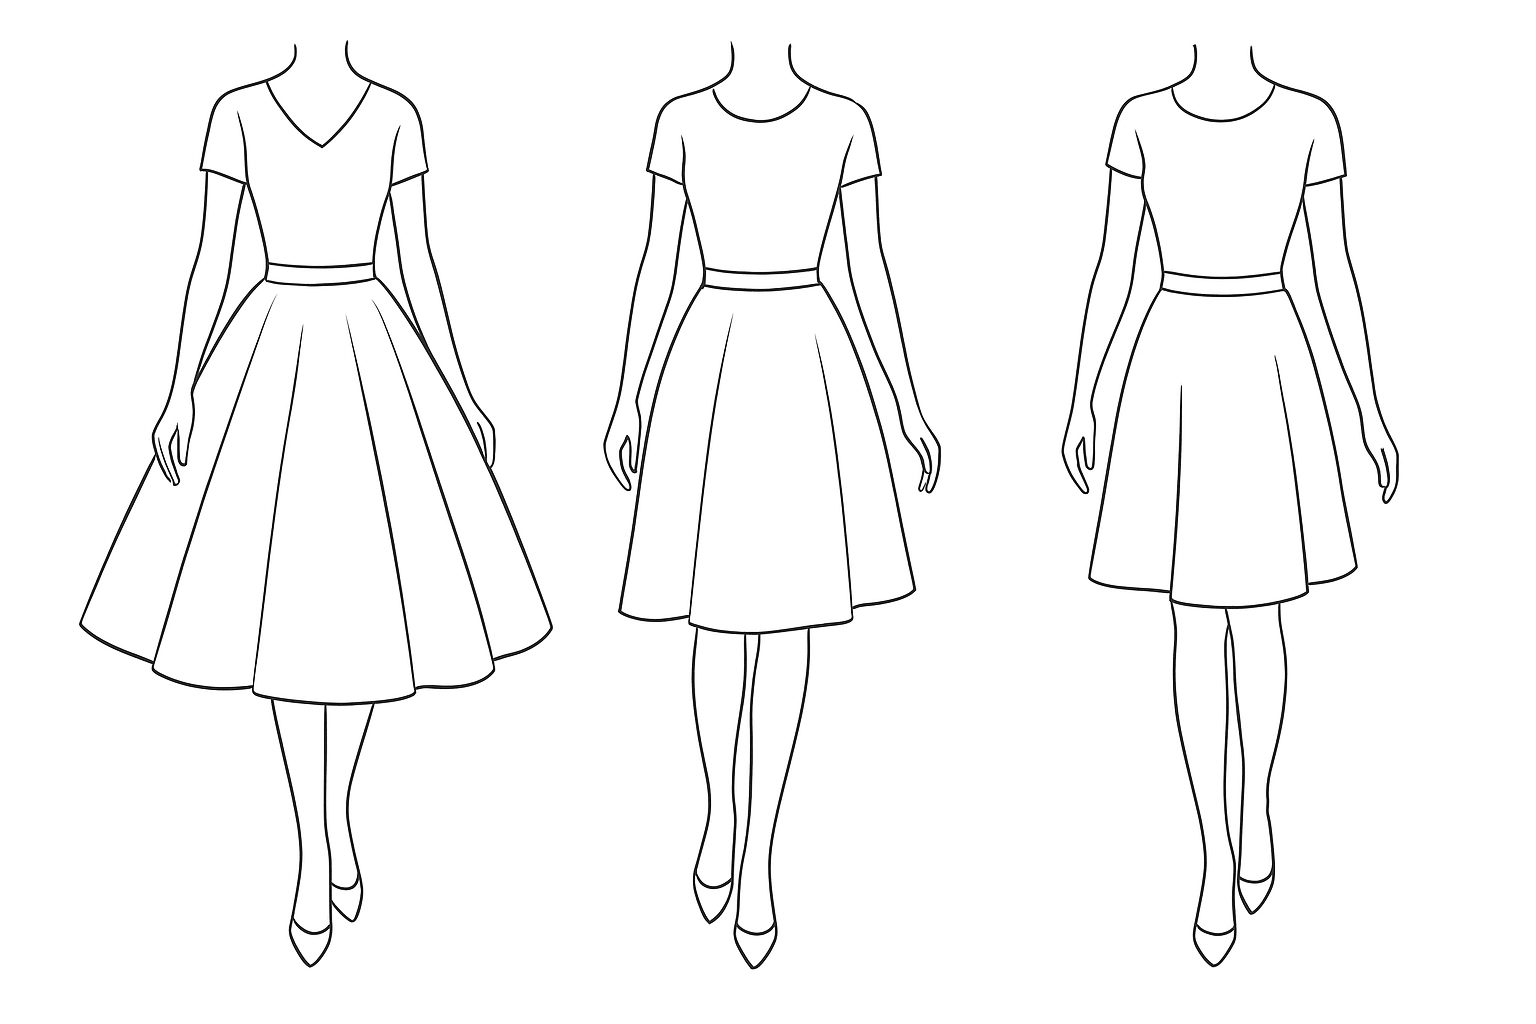

In [587]:
# Pearson Correlation
cols = ['age', 'waist_circum_preferred', 'hip_circum', 'hip_height',
       'knee_height', 'thigh_circum_proximal', 'u_crotch', 'height', 'weight',
       'waist_hip_length', 'full_length', 'radius', 'weight_kgs']
corr_matrix = bm_skirt[cols].corr(method="pearson")
corr_matrix

,age,waist_circum_preferred,hip_circum,hip_height,knee_height,thigh_circum_proximal,u_crotch,height,weight,waist_hip_length,full_length,radius,weight_kgs
age,1.000000,0.271629,0.236199,0.130723,-0.072081,0.158730,0.500167,-0.091632,0.262541,-0.057705,0.087008,0.271629,0.262541
waist_circum_preferred,0.271629,1.000000,0.821307,0.423241,0.161591,0.746608,0.573570,0.174491,0.896424,-0.394973,0.134359,1.000000,0.896424
hip_circum,0.236199,0.821307,1.000000,0.435135,0.192302,0.930295,0.753084,0.245228,0.938794,-0.196631,0.286359,0.821307,0.938794
hip_height,0.130723,0.423241,0.435135,1.000000,0.748409,0.356108,0.390558,0.710925,0.517757,-0.330268,0.744162,0.423241,0.517757
knee_height,-0.072081,0.161591,0.192302,0.748409,1.000000,0.180876,0.159741,0.891335,0.294985,0.165533,0.849016,0.161591,0.294985
thigh_circum_proximal,0.158730,0.746608,0.930295,0.356108,0.180876,1.000000,0.703909,0.222018,0.895576,-0.113465,0.267873,0.746608,0.895576
u_crotch,0.500167,0.573570,0.753084,0.390558,0.159741,0.703909,1.000000,0.226936,0.756991,0.083251,0.440595,0.573570,0.756991
height,-0.091632,0.174491,0.245228,0.710925,0.891335,0.222018,0.226936,1.000000,0.343388,0.236152,0.862339,0.174491,0.343388
weight,0.262541,0.896424,0.938794,0.517757,0.294985,0.895576,0.756991,0.343388,1.000000,-0.204672,0.361464,0.896424,1.000000
waist_hip_length,-0.057705,-0.394973,-0.196631,-0.330268,0.165533,-0.113465,0.083251,0.236152,-0.204672,1.000000,0.384743,-0.394973,-0.204672


### EDA (Correlation Analysis)

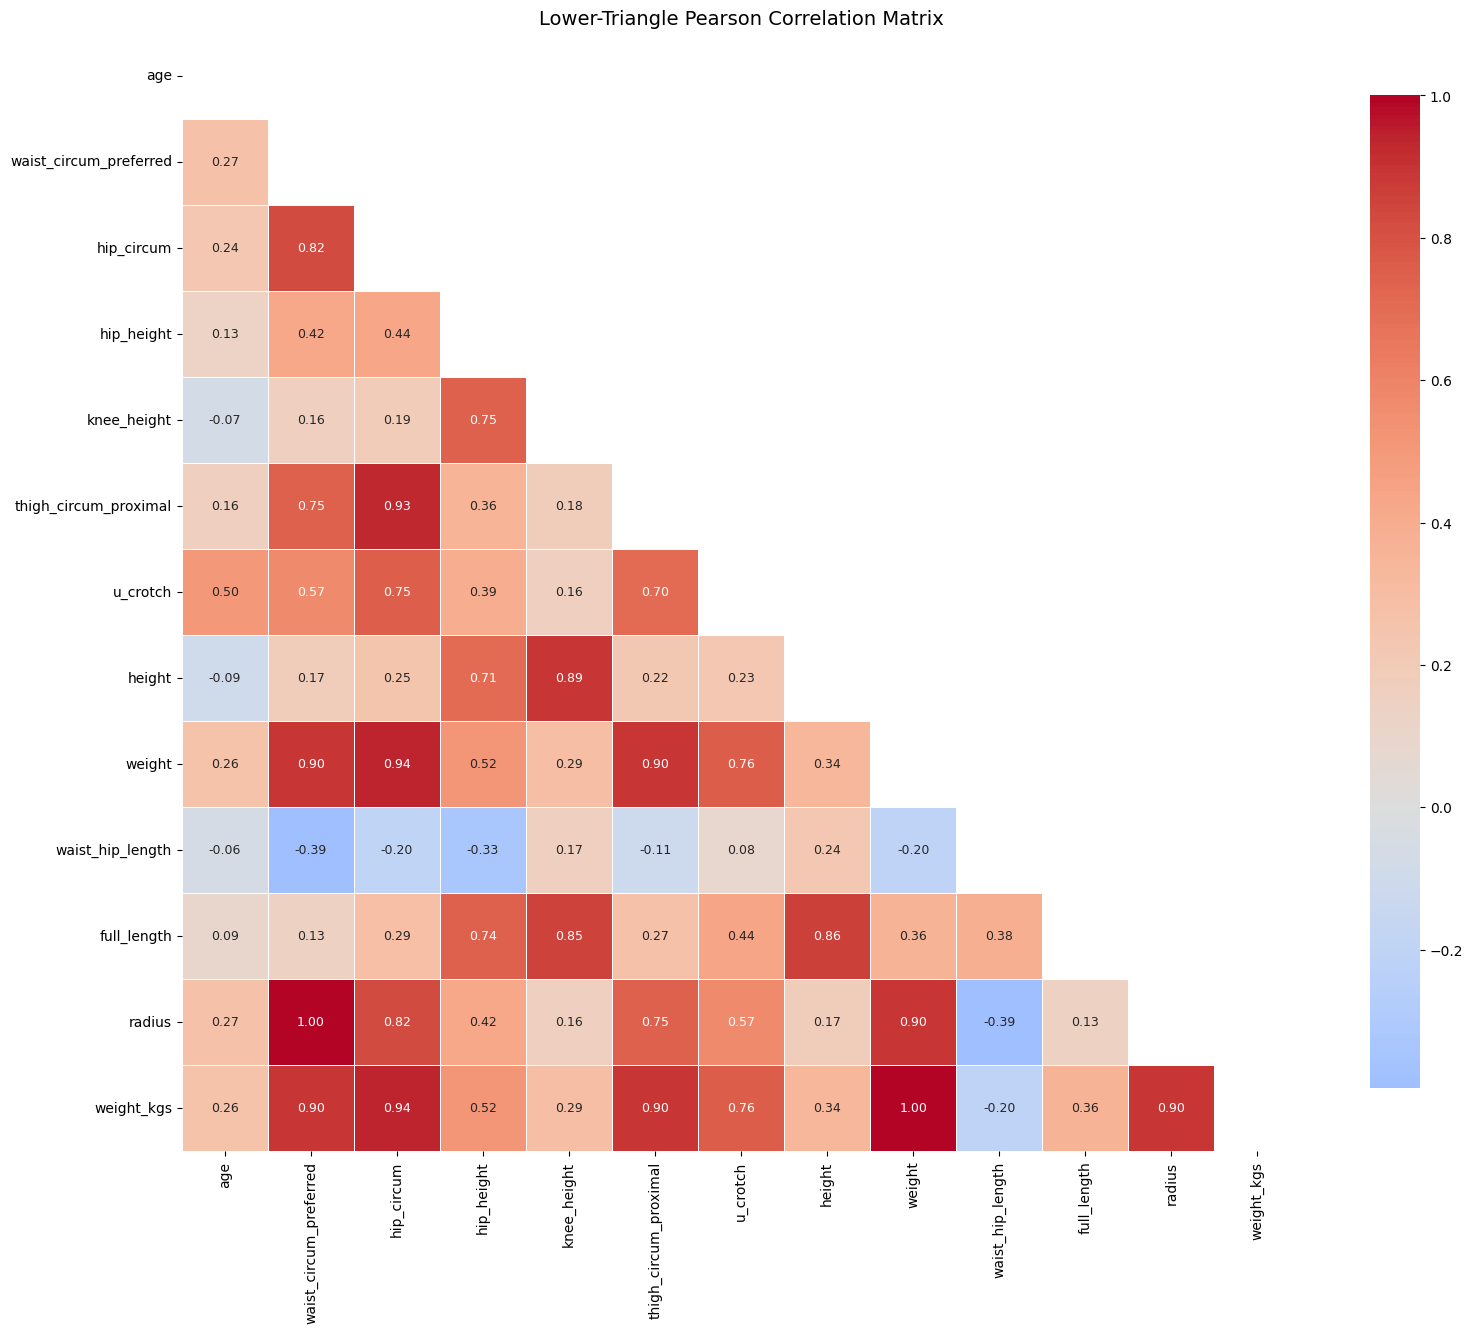

In [588]:
# Correlation heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,           
    fmt=".2f",          
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.8}
)

plt.title("Lower-Triangle Pearson Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

### EDA (Ratios Calculation)

In [589]:
# Creating a waist-hip-ratio feature
bm_skirt['waist_hip_ratio'] = (bm_skirt['waist_circum_preferred'] / bm_skirt['hip_circum'])

In [590]:
# Creating a thigh-hip-ratio feature
bm_skirt['thigh_hip_ratio'] = (bm_skirt['thigh_circum_proximal'] / bm_skirt['hip_circum'])

In [591]:
# Creating a waist-height-ratio feature
bm_skirt['waist_height_ratio'] = (bm_skirt['full_length'] / bm_skirt['height'])

In [592]:
# Creating a hip-height-ratio feature
bm_skirt['hip_height_ratio'] = (bm_skirt['hip_height'] / bm_skirt['height'])

In [593]:
# Creating a waist hip length ratio feature
bm_skirt['waist_hip_length_ratio'] = (bm_skirt['waist_hip_length'] / bm_skirt['height'])

In [594]:
# Creating a bmi feature as a control variable
bm_skirt['bmi'] = bm_skirt['weight'] / (bm_skirt['height'] / 100) ** 2

In [595]:
# Feature selection for clustering.
ratio_features = [
    'waist_hip_ratio',
    'thigh_hip_ratio',
    'waist_height_ratio',
    'hip_height_ratio',
    'waist_hip_length_ratio',
    'bmi'
]

## Machine Learning

In [596]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [597]:
# Selecting ratio features
X = bm_skirt[ratio_features].dropna()


In [598]:
bm_skirt.isna().sum()

age                       2
age_range                 2
waist_circum_preferred    0
hip_circum                0
hip_height                0
knee_height               0
thigh_circum_proximal     3
u_crotch                  5
height                    0
weight                    0
waist_hip_length          0
knee_length               0
micro_mini_length         0
mini_length               0
above_knee                0
below_knee                0
midi_length               0
tea_length                0
maxi_length               0
full_length               0
radius                    0
weight_kgs                0
waist_hip_ratio           0
thigh_hip_ratio           3
waist_height_ratio        0
hip_height_ratio          0
waist_hip_length_ratio    0
bmi                       0
dtype: int64

In [599]:
bm_skirt = bm_skirt.dropna(subset='thigh_circum_proximal')
bm_skirt.isna().sum()

age                       2
age_range                 2
waist_circum_preferred    0
hip_circum                0
hip_height                0
knee_height               0
thigh_circum_proximal     0
u_crotch                  5
height                    0
weight                    0
waist_hip_length          0
knee_length               0
micro_mini_length         0
mini_length               0
above_knee                0
below_knee                0
midi_length               0
tea_length                0
maxi_length               0
full_length               0
radius                    0
weight_kgs                0
waist_hip_ratio           0
thigh_hip_ratio           0
waist_height_ratio        0
hip_height_ratio          0
waist_hip_length_ratio    0
bmi                       0
dtype: int64

In [600]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

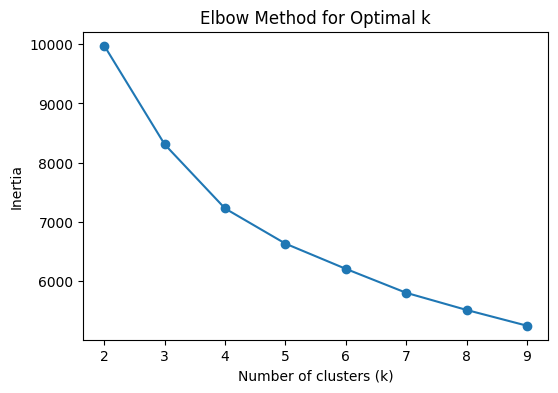

In [625]:
# Finding elbow bend for optimal number of clusters
inertia = []

K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=100)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [602]:
# Fitting the number of clusters on a kmeans model
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
bm_skirt['body_shape_cluster'] = kmeans.fit_predict(X_scaled)

/var/folders/tr/7nczqy6957313cq459kdk1ch0000gn/T/ipykernel_23393/2848446438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm_skirt['body_shape_cluster'] = kmeans.fit_predict(X_scaled)


In [603]:
# Verifying the number of clusters
bm_skirt.loc[X.index, 'body_shape_cluster'].nunique()

4

In [604]:
# Creating a dataframe with cluster centers.
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=ratio_features
)

cluster_centers

,waist_hip_ratio,thigh_hip_ratio,waist_height_ratio,hip_height_ratio,waist_hip_length_ratio,bmi
0,0.786909,0.571222,0.591071,0.480482,0.110589,310.320999
1,0.823801,0.592837,0.617364,0.495191,0.122173,420.708225
2,0.713061,0.572262,0.620646,0.485572,0.135074,322.481323
3,0.820607,0.557306,0.617212,0.544414,0.072799,473.001881


In [605]:
# Getting the centroids of the 4 clusters
centroids = kmeans.cluster_centers_

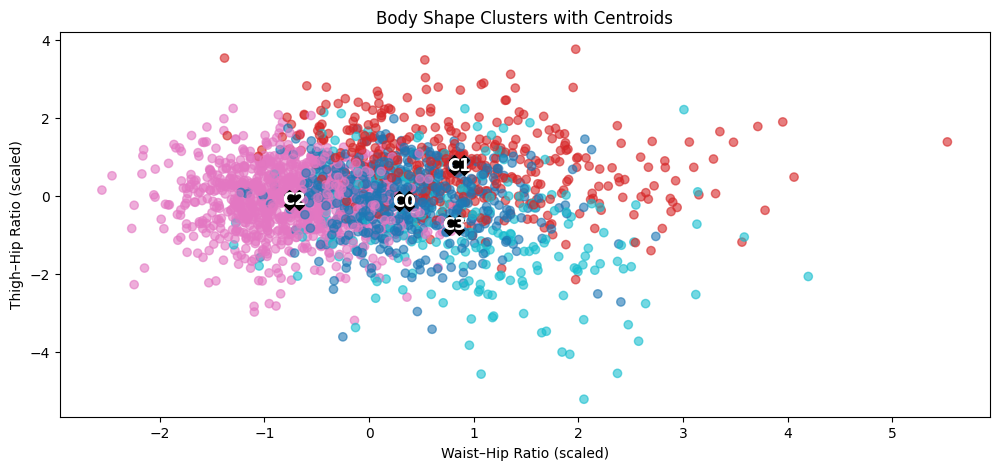

In [606]:
# Visualizing the clusters
plt.figure(figsize=(12,5))

scatter = plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=bm_skirt.loc[X.index, 'body_shape_cluster'],
    cmap='tab10',
    alpha=0.6
)

# Plot centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='black',
    s=200,
    marker='X',
    label='Centroid'
)

# Label centroids (ONLY first two dimensions)
for i in range(centroids.shape[0]):
    plt.text(
        centroids[i, 0],
        centroids[i, 1],
        f"C{i}",
        fontsize=12,
        fontweight='bold',
        ha='center',
        va='center',
        color='white'
    )

plt.xlabel("Waist–Hip Ratio (scaled)")
plt.ylabel("Thigh–Hip Ratio (scaled)")
plt.title("Body Shape Clusters with Centroids")

plt.show()


In [607]:
# Labeling clusters based on centroid location.
cluster_labels = {
    0: "High Waist / Narrow Hip",
    1: "Balanced Proportions",
    2: "Curvy Lower Body",
    3: "Fuller Thigh / Lower Waist"
}

bm_skirt['body_shape_label'] = bm_skirt['body_shape_cluster'].map(cluster_labels)


/var/folders/tr/7nczqy6957313cq459kdk1ch0000gn/T/ipykernel_23393/1091728601.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bm_skirt['body_shape_label'] = bm_skirt['body_shape_cluster'].map(cluster_labels)


## Performance evaluation

In [608]:
# silhouette scores
sil_score = silhouette_score(X_scaled, labels)

print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.169


In [609]:
# Davies–Bouldin Index (DBI)
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X_scaled, labels)
print(f"Davies–Bouldin Index: {db_index:.3f}")


Davies–Bouldin Index: 1.476


In [ ]:
# Cluster size balance
cluster_sizes = pd.Series(cluster_labels).value_counts().sort_index()
cluster_sizes


0    354
1    327
2     76
3    323
4    152
5    434
6    263
7    162
8    164
Name: count, dtype: int64

## Optimization using Principal Component Analysis

In [611]:
from sklearn.decomposition import PCA

In [612]:
# Fitting the PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [613]:
# Checking for explained variance
explained_var = pca.explained_variance_ratio_

print(f"PC1 explains {explained_var[0]*100:.2f}% of variance")
print(f"PC2 explains {explained_var[1]*100:.2f}% of variance")
print(f"Total explained variance: {(explained_var.sum()*100):.2f}%")


PC1 explains 39.35% of variance
PC2 explains 23.19% of variance
Total explained variance: 62.54%


In [614]:
# Transforming Cluster centroids into PCA space
centroids_pca = pca.transform(centroids)


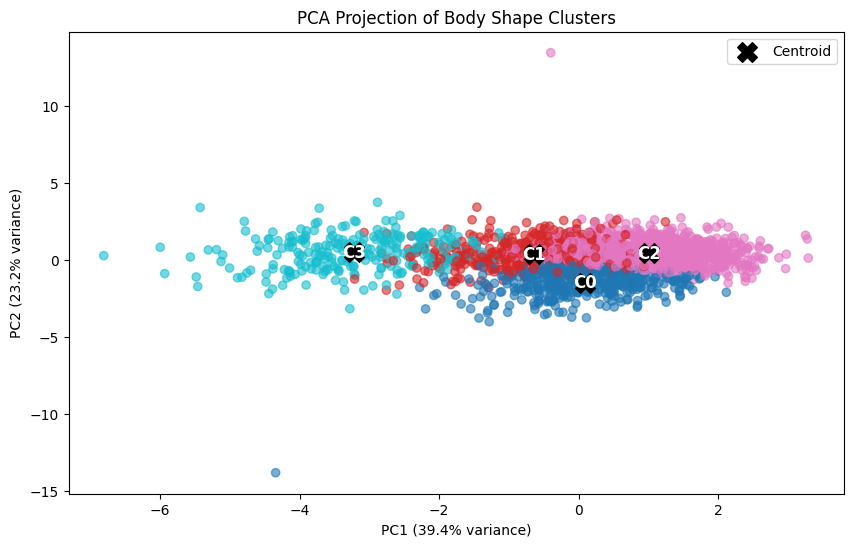

In [615]:
# PCA Cluster points with centroids
plt.figure(figsize=(10,6))

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=bm_skirt.loc[X.index, 'body_shape_cluster'],
    cmap='tab10',
    alpha=0.6
)

# Plot centroids
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='black',
    s=200,
    marker='X',
    label='Centroid'
)

# Label centroids
for i in range(centroids_pca.shape[0]):
    plt.text(
        centroids_pca[i, 0],
        centroids_pca[i, 1],
        f"C{i}",
        fontsize=12,
        fontweight='bold',
        ha='center',
        va='center',
        color='white'
    )

plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% variance)")
plt.title("PCA Projection of Body Shape Clusters")

plt.legend()
plt.show()


## Optimization with hyper-parameter tuning using different k-means



In [620]:
# Checking the performance of the sihouette score and daview-bouldin score over different kmeans.
results = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = km.fit_predict(X_scaled)

    results.append({
        'k': k,
        'Silhouette': silhouette_score(X_scaled, labels_k),
        'Davies-Bouldin': davies_bouldin_score(X_scaled, labels_k)
    })

pd.DataFrame(results)


,k,Silhouette,Davies-Bouldin
0,2,0.383128,1.348904
1,3,0.225309,1.526784
2,4,0.233888,1.376816
3,5,0.190552,1.453297
4,6,0.184197,1.402426
5,7,0.179067,1.466425
6,8,0.171304,1.464600
7,9,0.169454,1.476041
